# Time Series Forecasting

>A time series is a series of successive data points, equally spaced and temporally indexed. Structuring the data with respect to time adds an order to the observation.Time series methods of forecasting make predictions ,based on the historical patterns found in the dataset.

### The section described below shows the various types of TimeSeries Forecasting performed on the given datasets.


In [22]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from matplotlib import pyplot
from math import sqrt
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML

In [23]:
from IPython.core.display import display, HTML
display(HTML('<script src="https://www.gstatic.com/dialogflow-console/fast/messenger/bootstrap.js?v=1"></script>'
'<df-messenger intent="WELCOME" chat-title="COVID_ChatBot" agent-id="aaf92dc6-9bc5-44e8-bdce-aad65824f26f" language-code="en"></df-messenger>'))


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/AnuskaK10/CovidDataset/master/dataset4.csv')
#df.head()

In [4]:
#Creating train and test set 
#Index 77 marks the end of the training set
train=df[0:79] 
test=df[77:83]

In [5]:
#Plotting data
#train.new_cases.plot(figsize=(12,5), title= 'Daily New Cases', fontsize=14)
#test.new_cases.plot(figsize=(12,5), title= 'Daily New Cases', fontsize=14)
#pyplot.show()

# Naive Approach

In this forecasting technique, the value of the new data point is predicted to be equal to the previous data point. The result would be a flat line, since all new values take the previous values.

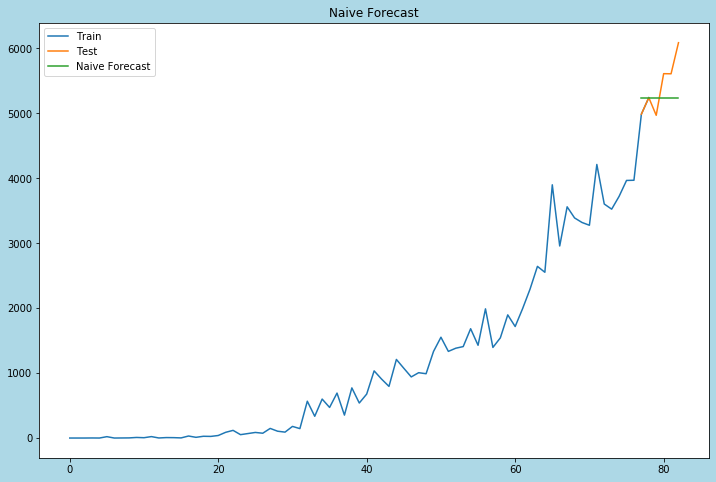

In [41]:
# Naive approach
dd= np.asarray(train.new_cases)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
fig=pyplot.figure(figsize=(12,8))
pyplot.plot(train.index, train['new_cases'], label='Train')
pyplot.plot(test.index,test['new_cases'], label='Test')
pyplot.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
pyplot.legend(loc='best')
pyplot.title("Naive Forecast")
fig.patch.set_facecolor('lightblue')
pyplot.show()


In [ ]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat.naive))
#print(rms)

# Simple Average Approach

The next value is taken as the average of all the previous values. The predictions here are better than the ‘Naive Approach’ as it doesn’t result in a flat line but here, all the past values are taken into consideration which might not always be useful. For instance, when asked to predict today’s new cases, we would consider the last 7 days’ new cases rather than the temperature a month ago .



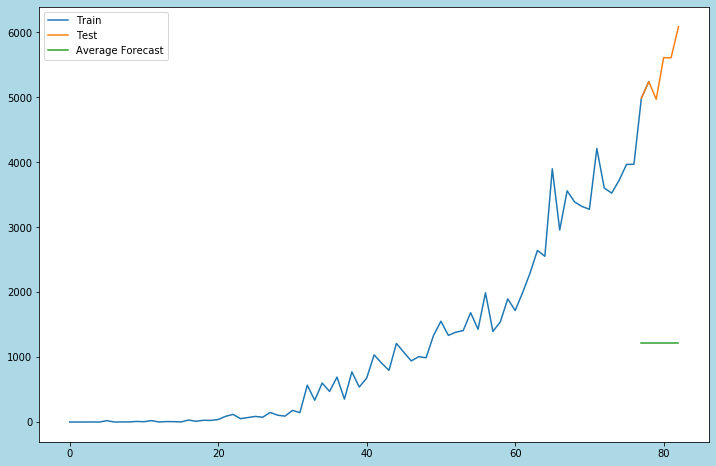

In [42]:
# Simple average
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['new_cases'].mean()
fig=pyplot.figure(figsize=(12,8))
pyplot.plot(train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
pyplot.legend(loc='best')
fig.patch.set_facecolor('lightblue')
pyplot.show()

In [9]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.avg_forecast))
#print(rms)

# Moving Average Approach

This is an improvement over the previous technique. Instead of taking the average of all the previous points, the average of ‘n’ previous points is taken to be the predicted value. 

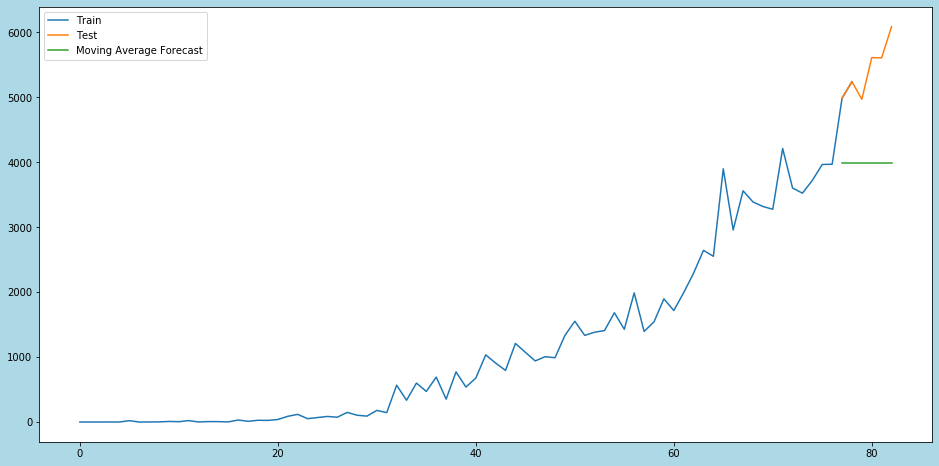

In [52]:
#Moving average
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['new_cases'].rolling(10).mean().iloc[-1]
fig=pyplot.figure(figsize=(16,8))
pyplot.plot(train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
pyplot.legend(loc='best')
fig.patch.set_facecolor('lightblue')
pyplot.show()

In [11]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.moving_avg_forecast))
#print(rms)

# Simple Exponential Smoothning Approach

 In this technique, larger weights are assigned to more recent observations than to observations from the distant past. 

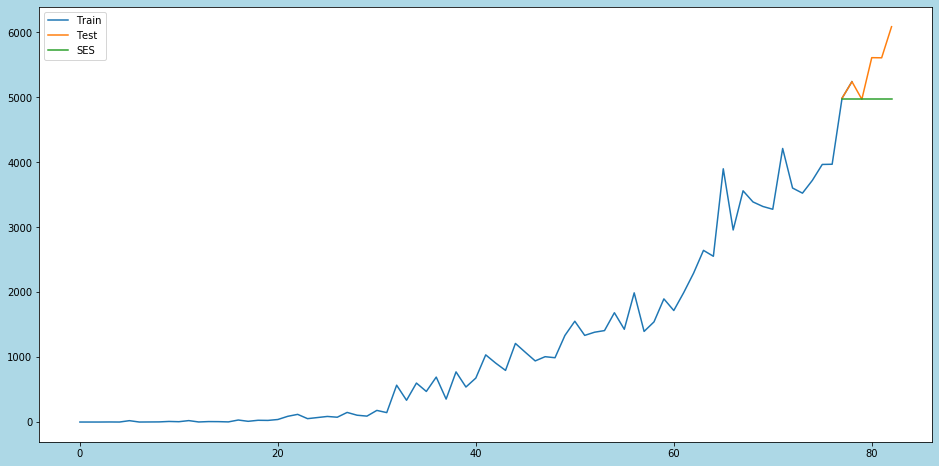

In [44]:
#Simple Exponential Smoothning
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['new_cases'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
fig=pyplot.figure(figsize=(16,8))
pyplot.plot(train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['SES'], label='SES')
pyplot.legend(loc='best')
fig.patch.set_facecolor('lightblue')
pyplot.show()

In [13]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.SES))
#print(rms)

# Holt Linear Trend Approach

If we use any of the above methods, it won’t take into account trend. Trend is the general pattern of prices that we observe over a period of time. In this case we can see that there is an increasing trend.

 >Trend is a component of time series forecasting, and can be seen by removing seasonality and noise components.

Here, we have used ETS decoposition to divide the time series into its constituent components.

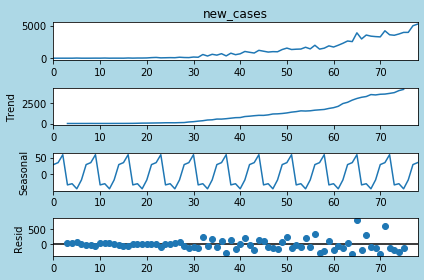

In [47]:
#Holt Linear Trend method
fig=sm.tsa.seasonal_decompose(train.new_cases,period=7).plot()
result = sm.tsa.stattools.adfuller(train.new_cases)
fig.patch.set_facecolor('lightblue')
pyplot.show()

* Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend. To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ.

<img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/eq-768x317.png width="300">

F:\Data\Users\Rahul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal



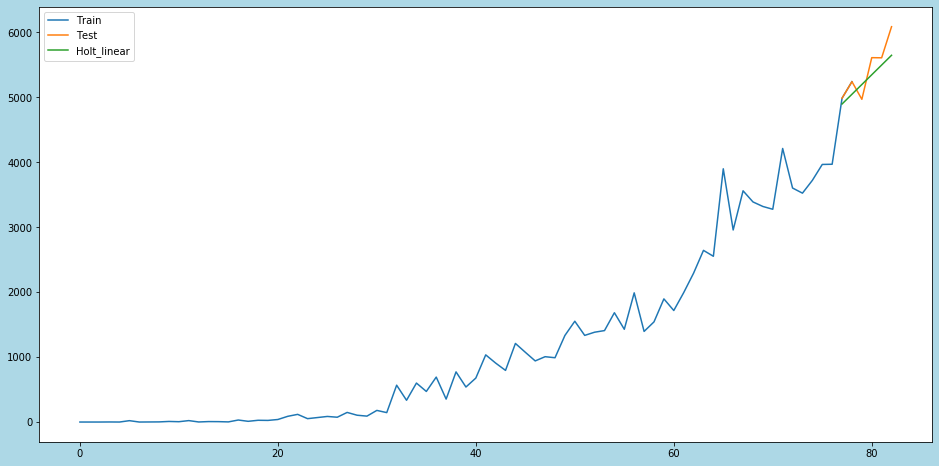

In [48]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['new_cases'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
fig=pyplot.figure(figsize=(16,8))
pyplot.plot(train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
pyplot.legend(loc='best')
fig.patch.set_facecolor('lightblue')
pyplot.show()

In [16]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.Holt_linear))
#print(rms)

# Holt Winters Approach

Holt-Winters is a model of time series behavior. Forecasting always requires a model, and Holt-Winters is a way to model three aspects of the time series: a typical value (average), a slope (trend) over time, and a cyclical repeating pattern (seasonality).  

F:\Data\Users\Rahul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning:

invalid value encountered in less_equal

F:\Data\Users\Rahul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal



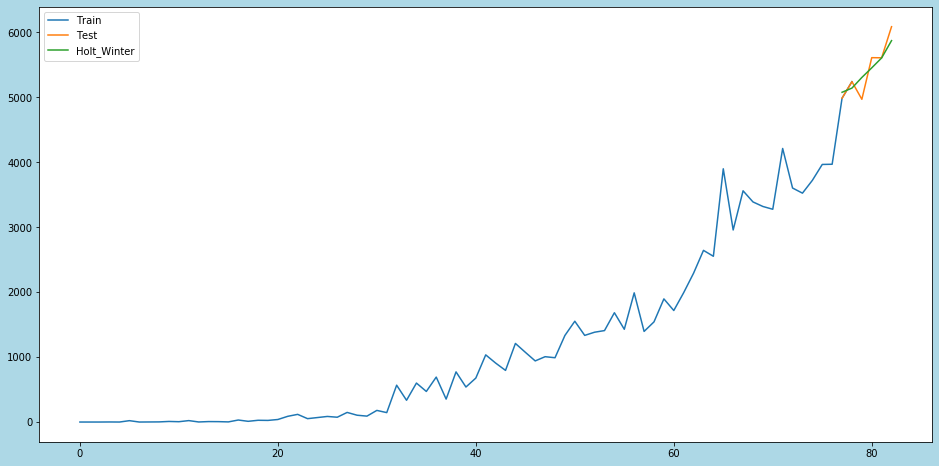

In [49]:
#Holt Winters
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['new_cases']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
fig=pyplot.figure(figsize=(16,8))
pyplot.plot( train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
pyplot.legend(loc='best')
fig.patch.set_facecolor('lightblue')
pyplot.show()

In [50]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.Holt_Winter))
#print(rms)
